In [2]:
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# sns.set_theme(style="whitegrid", palette="muted")
sns.set_theme()

base_dir = os.path.abspath('../../..')
datasink_dir = os.path.join(base_dir, 'derivatives', 'datasink')
manualwork_dir = os.path.join(base_dir, 'derivatives', 'manualwork')

In [4]:
exp_num = '01'
csv_file = os.path.join(datasink_dir, 'csv_work', 'exp-{}'.format(exp_num),
                        'exp-{}_high_res.csv'.format(exp_num))
hr_df = pd.read_csv(csv_file)
hr_df['ISH'] = hr_df['std'] / hr_df['mean']

In [5]:
csv_file = os.path.join(datasink_dir, 'csv_work', 'exp-{}'.format(exp_num),
                        'exp-{}_high_res.csv'.format(exp_num))
fast_df = pd.read_csv(csv_file)
hr_df['ISH'] = hr_df['std'] / hr_df['mean']

In [4]:
exp_num = '01'
csv_file = os.path.join(datasink_dir, 'csv_work', 'exp-{}'.format(exp_num),
                        'exp-{}_high_res.csv'.format(exp_num))
full_df = pd.read_csv(csv_file)
full_df['ISH'] = full_df['std'] / full_df['mean']
full_df.columns

Index(['Unnamed: 0', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'file', 'scan', 'BodyPartExamined', 'SeriesDescription',
       'ScanningSequence', 'SequenceVariant', 'SequenceName', 'ImageType',
       'SeriesNumber', 'AcquisitionTime', 'AcquisitionNumber',
       'SliceThickness', 'SAR', 'EchoTime', 'RepetitionTime', 'FlipAngle',
       'PartialFourier', 'BaseResolution', 'TxRefAmp', 'PhaseResolution',
       'ReceiveCoilActiveElements', 'PulseSequenceDetails', 'PercentPhaseFOV',
       'PercentSampling', 'PhaseEncodingSteps', 'AcquisitionMatrixPE',
       'ReconMatrixPE', 'PixelBandwidth', 'DwellTime', 'ISH'],
      dtype='object')

In [5]:
filt_df = full_df[full_df['Unnamed: 0']>0]
filt_df.rename(columns={'Unnamed: 0':'ROI'}, inplace=True)
filt_df.drop(columns=['min','25%','50%','75%', 'max', 'file', 'SAR', 'SeriesNumber'], inplace=True)
filt_df.columns

/usr/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/usr/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['ROI', 'count', 'mean', 'std', 'scan', 'BodyPartExamined',
       'SeriesDescription', 'ScanningSequence', 'SequenceVariant',
       'SequenceName', 'ImageType', 'AcquisitionTime', 'AcquisitionNumber',
       'SliceThickness', 'EchoTime', 'RepetitionTime', 'FlipAngle',
       'PartialFourier', 'BaseResolution', 'TxRefAmp', 'PhaseResolution',
       'ReceiveCoilActiveElements', 'PulseSequenceDetails', 'PercentPhaseFOV',
       'PercentSampling', 'PhaseEncodingSteps', 'AcquisitionMatrixPE',
       'ReconMatrixPE', 'PixelBandwidth', 'DwellTime', 'ISH'],
      dtype='object')

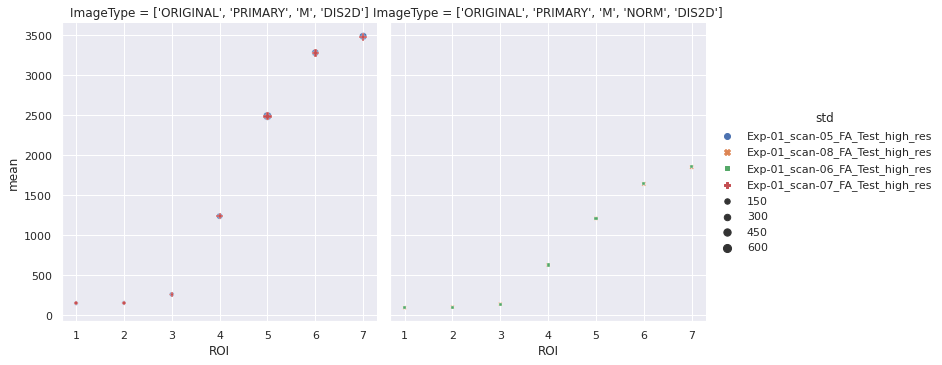

In [6]:
sns_plot = sns.relplot(x='ROI',
                       y='mean',
                       size='std',
                       hue=filt_df.scan.tolist(),
                       style=filt_df.scan.tolist(),
                       col= 'ImageType',
                       # kind='line',
                       data=filt_df)

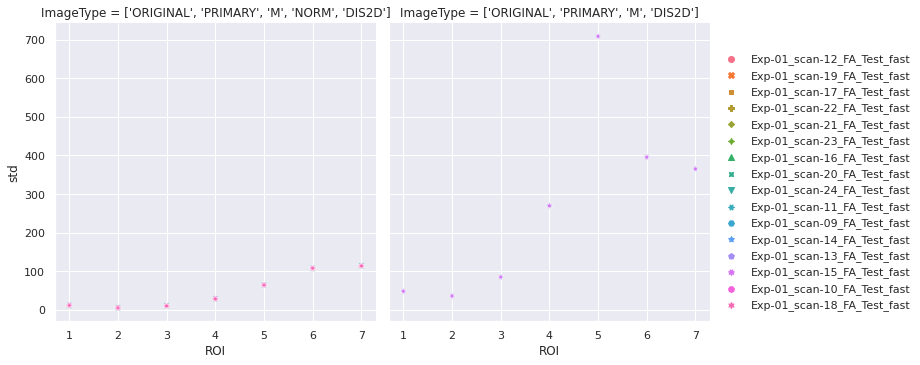

In [7]:
sns_plot = sns.relplot(x='ROI',
                       y='std',
                       # size='std',
                       hue=filt_df.scan.tolist(),
                       style=filt_df.scan.tolist(),
                       col= 'ImageType',
                       # kind='line',
                       data=filt_df)

In [5]:
for col in filt_df.columns:
    if len(filt_df[col].unique()) == 1:
        filt_df.drop(col,inplace=True,axis=1)
        
filt_df

,ROI,count,mean,std,scan,ImageType,AcquisitionTime,ISH
2,1.0,11406.0,84.067116,11.711772,Exp-01_scan-12_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:37.487500,0.139315
3,2.0,8562.0,95.809156,5.715276,Exp-01_scan-12_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:37.487500,0.059653
4,3.0,8770.0,133.551161,10.388098,Exp-01_scan-12_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:37.487500,0.077784
5,4.0,9771.0,623.591275,28.699474,Exp-01_scan-12_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:37.487500,0.046023
6,5.0,10455.0,1290.801534,64.415627,Exp-01_scan-12_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:37.487500,0.049904
...,...,...,...,...,...,...,...,...
139,3.0,8770.0,133.485637,10.327386,Exp-01_scan-18_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:55.537500,0.077367
140,4.0,9771.0,623.612589,28.635776,Exp-01_scan-18_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:55.537500,0.045919
141,5.0,10455.0,1290.888913,64.457918,Exp-01_scan-18_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:55.537500,0.049933
142,6.0,10765.0,1835.045934,107.902688,Exp-01_scan-18_FA_Test_fast,"['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']",10:08:55.537500,0.058801


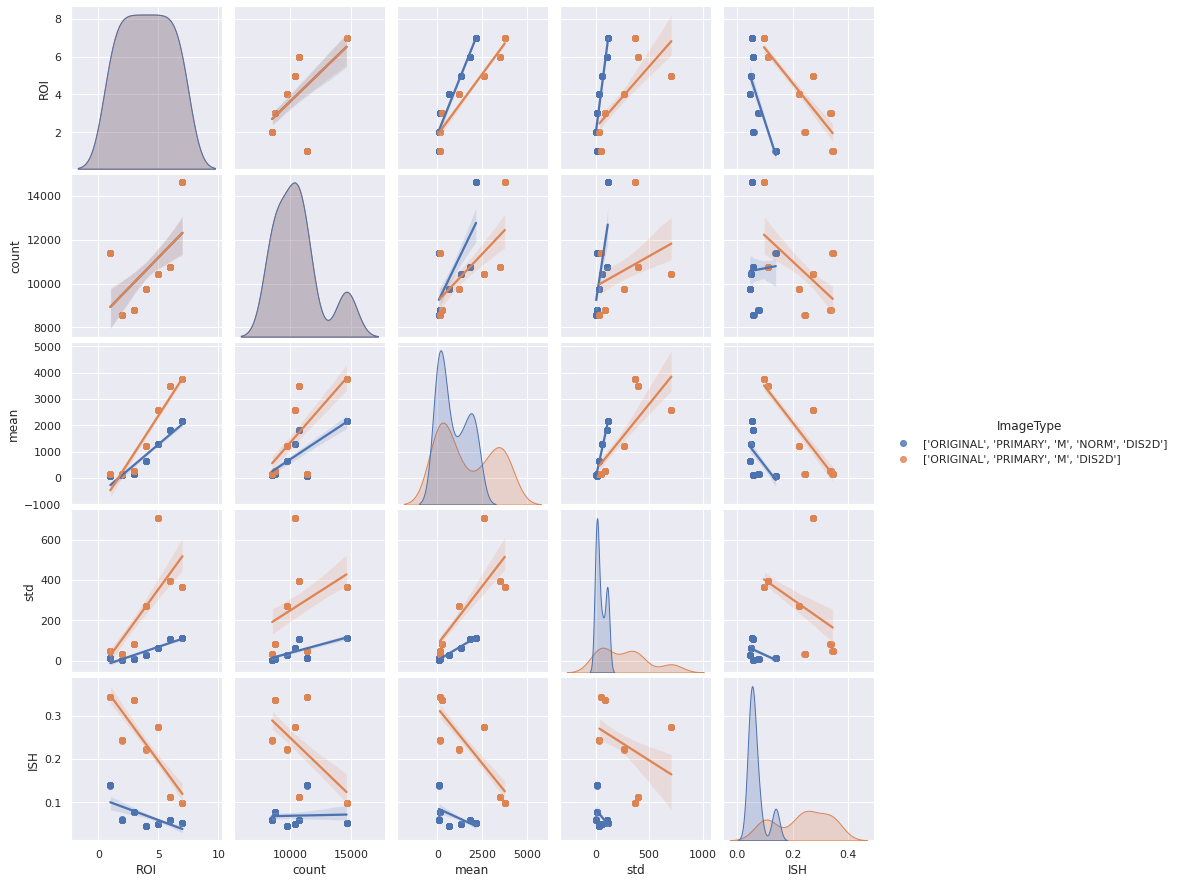

In [6]:
sns.pairplot(filt_df, hue='ImageType', kind='reg')

In [ ]:
#define a color palette index based on column 'B'
df['cind'] = pd.Categorical(df['B']).labels

#how many categories in column 'A'
cats = df['A'].unique()
cats.sort()

#get the seaborn colour palette and convert to array
cp = sns.color_palette()
cpa = np.array(cp)

#draw a subplot for each category in column "A"
fig, axs = plt.subplots(nrows=1, ncols=len(cats), sharey=True)
for i,ax in enumerate(axs):
    df_sub = df[df['A'] == cats[i]]
    col = cpa[df_sub['cind']]
    ax.scatter(df_sub['C'], df_sub['D'], c=col)
    eb = ax.errorbar(df_sub['C'], df_sub['D'], yerr=df_sub['E'], fmt=None)
    a, (b, c), (d,) = eb.lines
    d.set_color(col)

In [ ]:
sns_plot = sns.relplot(x='Unnamed: 0',
                       y='mean',
                       hue=filt_df.scan.tolist(),
                       style=filt_df.scan.tolist(),
                       col= 'ImageType',
                       # kind='line',
                       data=filt_df)